In [1]:
import pandas as pd
import numpy as np

In [2]:
dataframe = pd.read_csv(r'MICRODADOS_ENEM_2023.csv', encoding='ISO-8859-1', delimiter=';')

In [3]:
colunas = ['NU_NOTA_MT', 'Q002', 'TP_ESCOLA', 'TP_PRESENCA_CN', 'TP_PRESENCA_CH', 'TP_PRESENCA_MT']
df = dataframe[colunas]

dataframe.columns

Index(['NU_INSCRICAO', 'NU_ANO', 'TP_FAIXA_ETARIA', 'TP_SEXO',
       'TP_ESTADO_CIVIL', 'TP_COR_RACA', 'TP_NACIONALIDADE', 'TP_ST_CONCLUSAO',
       'TP_ANO_CONCLUIU', 'TP_ESCOLA', 'TP_ENSINO', 'IN_TREINEIRO',
       'CO_MUNICIPIO_ESC', 'NO_MUNICIPIO_ESC', 'CO_UF_ESC', 'SG_UF_ESC',
       'TP_DEPENDENCIA_ADM_ESC', 'TP_LOCALIZACAO_ESC', 'TP_SIT_FUNC_ESC',
       'CO_MUNICIPIO_PROVA', 'NO_MUNICIPIO_PROVA', 'CO_UF_PROVA',
       'SG_UF_PROVA', 'TP_PRESENCA_CN', 'TP_PRESENCA_CH', 'TP_PRESENCA_LC',
       'TP_PRESENCA_MT', 'CO_PROVA_CN', 'CO_PROVA_CH', 'CO_PROVA_LC',
       'CO_PROVA_MT', 'NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_LC', 'NU_NOTA_MT',
       'TX_RESPOSTAS_CN', 'TX_RESPOSTAS_CH', 'TX_RESPOSTAS_LC',
       'TX_RESPOSTAS_MT', 'TP_LINGUA', 'TX_GABARITO_CN', 'TX_GABARITO_CH',
       'TX_GABARITO_LC', 'TX_GABARITO_MT', 'TP_STATUS_REDACAO',
       'NU_NOTA_COMP1', 'NU_NOTA_COMP2', 'NU_NOTA_COMP3', 'NU_NOTA_COMP4',
       'NU_NOTA_COMP5', 'NU_NOTA_REDACAO', 'Q001', 'Q002', 'Q003', 'Q004',

In [4]:
df_cleaned = df.dropna(subset=['NU_NOTA_MT', 'Q002', 'TP_ESCOLA', 'TP_PRESENCA_CN', 'TP_PRESENCA_CH', 'TP_PRESENCA_MT'])


In [5]:
X = df_cleaned[['Q002', 'TP_ESCOLA', 'TP_PRESENCA_CN', 'TP_PRESENCA_CH', 'TP_PRESENCA_MT']]
y = df_cleaned['NU_NOTA_MT']


In [6]:
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder(sparse_output=False, drop='first')
X_encoded = encoder.fit_transform(X[['Q002', 'TP_ESCOLA']])


In [7]:
X = X.drop(columns=['Q002', 'TP_ESCOLA'])
X_encoded_df = pd.DataFrame(X_encoded, columns=encoder.get_feature_names_out(['Q002', 'TP_ESCOLA']))
X = pd.concat([X.reset_index(drop=True), X_encoded_df], axis=1)


In [8]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [9]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


In [10]:
from sklearn.linear_model import LinearRegression
model_lr = LinearRegression()
model_lr.fit(X_train, y_train)
y_pred_lr = model_lr.predict(X_test)


In [11]:
from sklearn.ensemble import RandomForestRegressor
model_rf = RandomForestRegressor(random_state=42)
model_rf.fit(X_train, y_train)
y_pred_rf = model_rf.predict(X_test)


In [12]:
from sklearn.model_selection import GridSearchCV
param_grid = {
    'n_estimators': [50, 100],
    'max_depth': [10, None],
    'min_samples_split': [2, 5]
}
grid_search = GridSearchCV(RandomForestRegressor(random_state=42), param_grid, cv=2, scoring='neg_mean_absolute_error')
grid_search.fit(X_train, y_train)
best_model_rf = grid_search.best_estimator_
y_pred_rf_best = best_model_rf.predict(X_test)


In [13]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
mae_lr = mean_absolute_error(y_test, y_pred_lr)
rmse_lr = mean_squared_error(y_test, y_pred_lr, squared=False)
r2_lr = r2_score(y_test, y_pred_lr)

mae_rf = mean_absolute_error(y_test, y_pred_rf)
rmse_rf = mean_squared_error(y_test, y_pred_rf, squared=False)
r2_rf = r2_score(y_test, y_pred_rf)


C:\Users\Nicolas\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
C:\Users\Nicolas\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [14]:
print("Resultados da Regressão Linear:")
print(f"MAE: {mae_lr}, RMSE: {rmse_lr}, R²: {r2_lr}")

print("\nResultados do Random Forest:")
print(f"MAE: {mae_rf}, RMSE: {rmse_rf}, R²: {r2_rf}")


Resultados da Regressão Linear:
MAE: 96.8267902811829, RMSE: 121.11003998407804, R²: 0.15438714647879215

Resultados do Random Forest:
MAE: 96.60948716603684, RMSE: 120.9062307198956, R²: 0.157230820210574


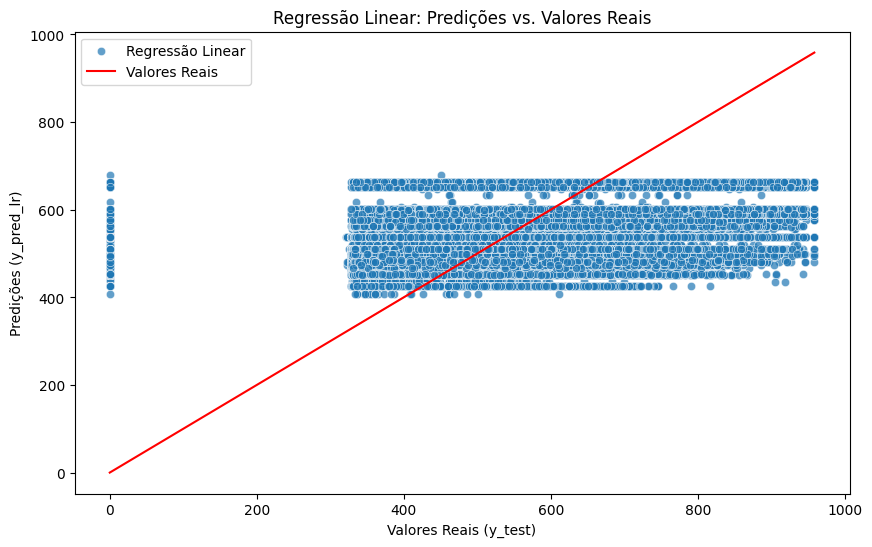

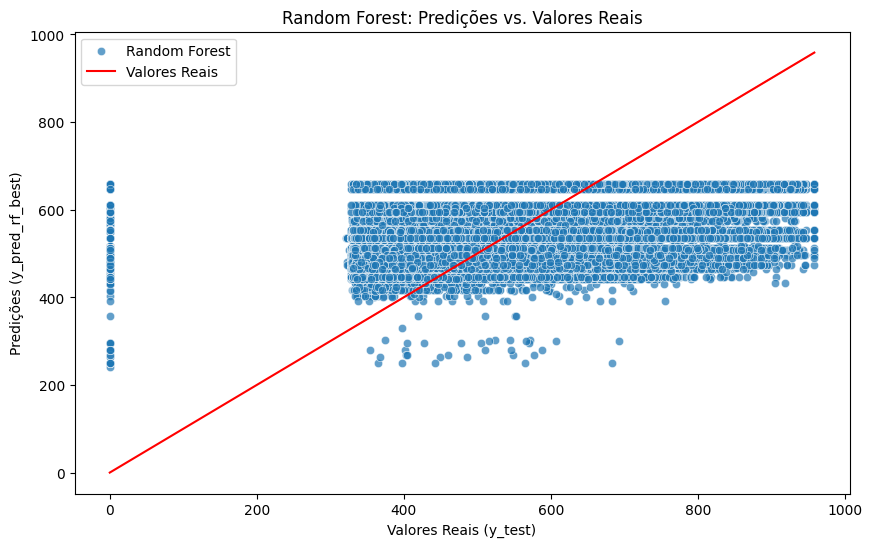

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

# Gráfico de dispersão para o modelo de Regressão Linear
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=y_pred_lr, alpha=0.7, label='Regressão Linear')
sns.lineplot(x=y_test, y=y_test, color='red', label='Valores Reais')  # Linha de referência
plt.title("Regressão Linear: Predições vs. Valores Reais")
plt.xlabel("Valores Reais (y_test)")
plt.ylabel("Predições (y_pred_lr)")
plt.legend()
plt.show()

# Gráfico de dispersão para o modelo de Random Forest
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=y_pred_rf_best, alpha=0.7, label='Random Forest')
sns.lineplot(x=y_test, y=y_test, color='red', label='Valores Reais')  # Linha de referência
plt.title("Random Forest: Predições vs. Valores Reais")
plt.xlabel("Valores Reais (y_test)")
plt.ylabel("Predições (y_pred_rf_best)")
plt.legend()
plt.show()


C:\Users\Nicolas\AppData\Local\Temp\ipykernel_14296\2995671158.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=feature_importances["Importância"], y=feature_importances.index, palette='viridis')


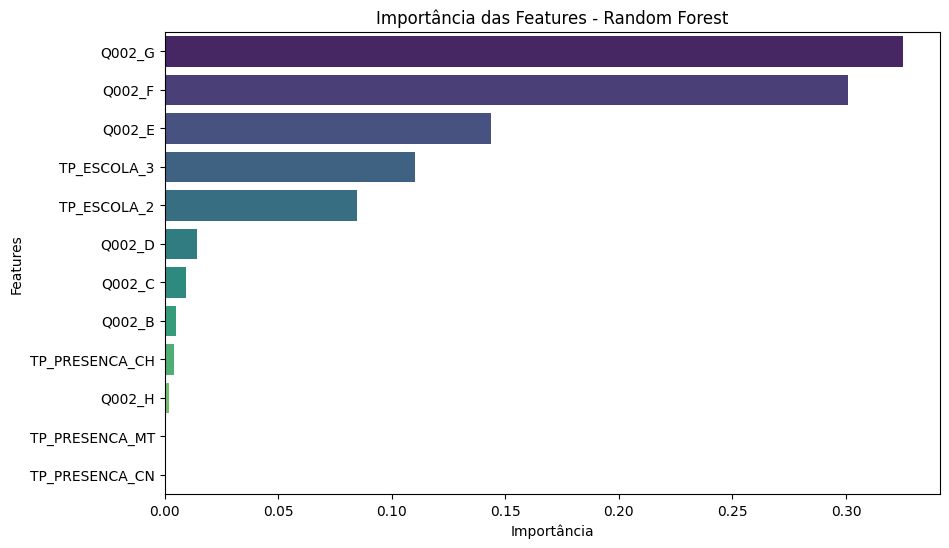

In [17]:
# Importância das Features
import pandas as pd

feature_importances = pd.DataFrame(
    best_model_rf.feature_importances_,
    index=X.columns,
    columns=["Importância"]
).sort_values(by="Importância", ascending=False)

# Gráfico de barras
plt.figure(figsize=(10, 6))
sns.barplot(x=feature_importances["Importância"], y=feature_importances.index, palette='viridis')
plt.title("Importância das Features - Random Forest")
plt.xlabel("Importância")
plt.ylabel("Features")
plt.show()


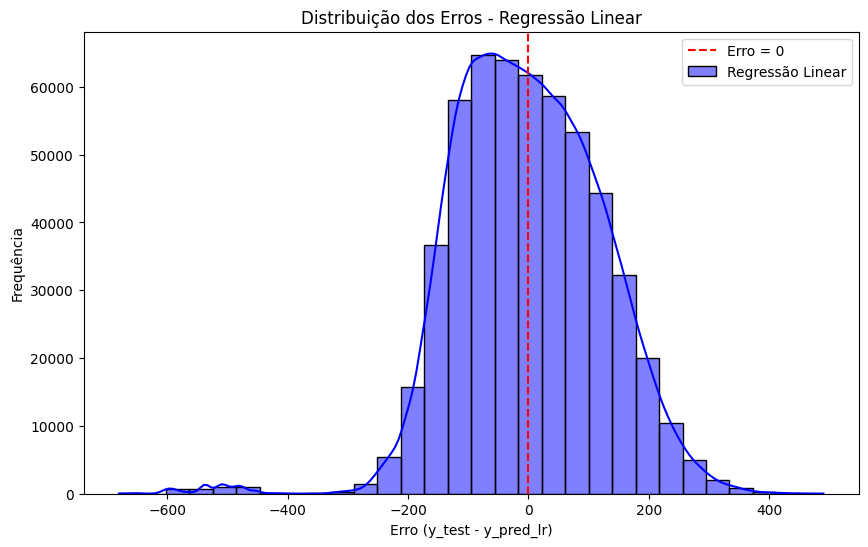

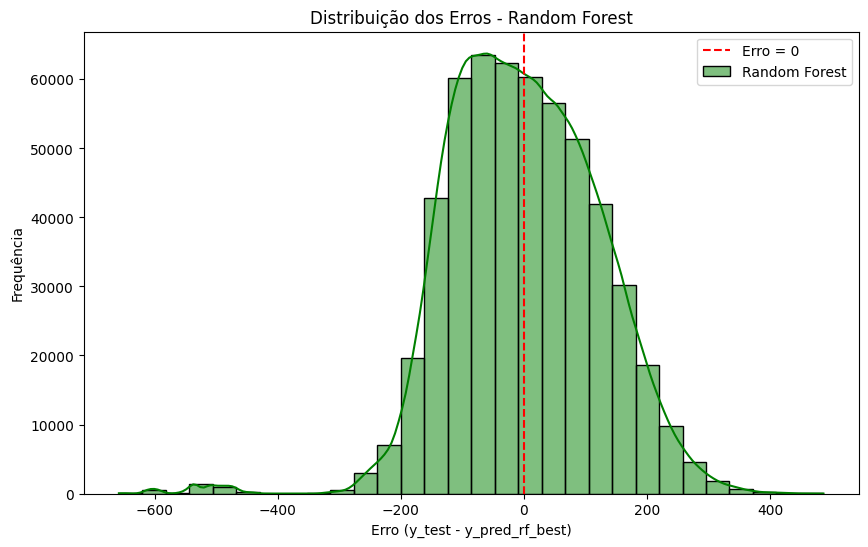

In [18]:
# Resíduos (erros) da Regressão Linear
residuals_lr = y_test - y_pred_lr

plt.figure(figsize=(10, 6))
sns.histplot(residuals_lr, kde=True, bins=30, color='blue', label='Regressão Linear')
plt.axvline(0, color='red', linestyle='--', label='Erro = 0')
plt.title("Distribuição dos Erros - Regressão Linear")
plt.xlabel("Erro (y_test - y_pred_lr)")
plt.ylabel("Frequência")
plt.legend()
plt.show()

# Resíduos (erros) do Random Forest
residuals_rf = y_test - y_pred_rf_best

plt.figure(figsize=(10, 6))
sns.histplot(residuals_rf, kde=True, bins=30, color='green', label='Random Forest')
plt.axvline(0, color='red', linestyle='--', label='Erro = 0')
plt.title("Distribuição dos Erros - Random Forest")
plt.xlabel("Erro (y_test - y_pred_rf_best)")
plt.ylabel("Frequência")
plt.legend()
plt.show()


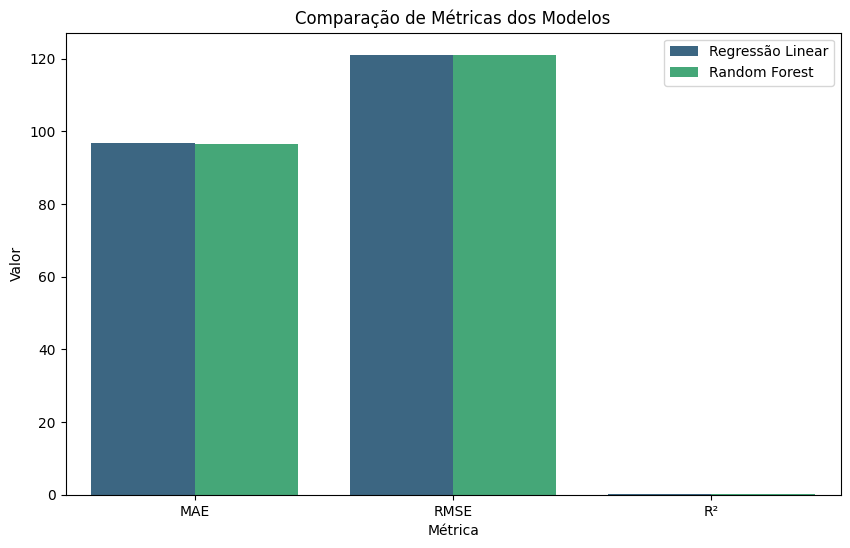

In [19]:
# Comparação de métricas
metrics_df = pd.DataFrame({
    "Modelo": ["Regressão Linear", "Random Forest"],
    "MAE": [mae_lr, mae_rf],
    "RMSE": [rmse_lr, rmse_rf],
    "R²": [r2_lr, r2_rf]
})

metrics_df_melted = metrics_df.melt(id_vars="Modelo", var_name="Métrica", value_name="Valor")

plt.figure(figsize=(10, 6))
sns.barplot(data=metrics_df_melted, x="Métrica", y="Valor", hue="Modelo", palette="viridis")
plt.title("Comparação de Métricas dos Modelos")
plt.xlabel("Métrica")
plt.ylabel("Valor")
plt.legend()
plt.show()
